# Named Entity Recognition

In [38]:
from xml.etree import ElementTree as ET
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt

import shutil

### 3. Sort bills according to their size and take top 50 (largest) bills.

In [5]:
acts_dir = Path("./ustawy/")

acts_stats = ((act.name, act.stat().st_size) for act in acts_dir.iterdir())
acts_stats = sorted(acts_stats, key=lambda x: x[1], reverse=True)
acts_stats[:10] ## Displaying only

[('2000_696.txt', 579582),
 ('1996_465.txt', 420981),
 ('2001_627.txt', 413929),
 ('1997_555.txt', 396494),
 ('2002_1689.txt', 352618),
 ('2000_1186.txt', 275546),
 ('1998_1118.txt', 271036),
 ('1997_117.txt', 262973),
 ('2001_1070.txt', 259359),
 ('2001_1368.txt', 258344)]

In [6]:
acts_50_longest = [path for path, size in acts_stats[:50]] 
acts_50_longest[:10]

['2000_696.txt',
 '1996_465.txt',
 '2001_627.txt',
 '1997_555.txt',
 '2002_1689.txt',
 '2000_1186.txt',
 '1998_1118.txt',
 '1997_117.txt',
 '2001_1070.txt',
 '2001_1368.txt']

### 5. Use the lemmatized and sentence split documents (from ex. 5) to identify the expressions that consist of consecutive words starting with a capital letter (you will have to look at the inflected form of the word to check its capitalization) that do not occupy the first position in a sentence.

Used lemmatized corpus from Lab4. It was made with Clarin.

In [17]:

clarin_acts_dir = Path("./Wynik/")

# clarin_acts_stats = ((act.name, act.stat().st_size) for act in clarin_acts_dir.iterdir())
#clarin_acts_stats = sorted(clarin_acts_stats, key=lambda x: x[1], reverse=True)
# acts_50_longest_clarin = [path for path, size in clarin_acts_stats[:50]] 

acts_50_longest_clarin = [clarin_acts_dir / act for act in acts_50_longest]
len(acts_50_longest_clarin)

50

In [18]:
acts_50_longest_clarin[:10]

[PosixPath('Wynik/2000_696.txt'),
 PosixPath('Wynik/1996_465.txt'),
 PosixPath('Wynik/2001_627.txt'),
 PosixPath('Wynik/1997_555.txt'),
 PosixPath('Wynik/2002_1689.txt'),
 PosixPath('Wynik/2000_1186.txt'),
 PosixPath('Wynik/1998_1118.txt'),
 PosixPath('Wynik/1997_117.txt'),
 PosixPath('Wynik/2001_1070.txt'),
 PosixPath('Wynik/2001_1368.txt')]

In [19]:
acts_entities = {}

for act in acts_50_longest_clarin:
    
    act_id = act.stem
    content = act.read_text(encoding="utf8")
    tree = ET.fromstring(text=content)
    
    entities = []
    for sentence in tree.iter("sentence"):
        tokens = list(sentence.iter("tok"))[1:]
        entity_parts = []
        for token in tokens:
            orth = token.find("orth")
            if orth.text[0].isupper():
                base = token.find("lex").find("base").text.capitalize()
                entity_parts.append(base)
            elif len(entity_parts) > 0:
                entity = " ".join(entity_parts)
                entities.append(entity)
                entity_parts = []
    
    acts_entities[act_id] = entities

In [23]:
acts_entities

{'2000_696': ['U',
  'Dzieje_(apostolskie)',
  'U',
  'Minister',
  'Art',
  'Dzieje_(apostolskie)',
  'U',
  'Nr',
  'Art',
  'Minister Sprawa Wewnętrzny',
  'Minister',
  'Minister Sprawa Wewnętrzny',
  'Minister',
  'Art',
  'Prawa',
  'Dzieje_(apostolskie)',
  'U',
  'Nr',
  'Minister Sprawa Wewnętrzny',
  'Administracja',
  'Dzieje_(apostolskie)',
  'U',
  'Nr',
  'Dzieje_(apostolskie)',
  'U',
  'Nr',
  'Art',
  'Ziemia Odzyskać',
  'Miasto Gdańsk',
  'Dzieje_(apostolskie)',
  'U',
  'Nr',
  'Art',
  'Art',
  'Ziemia Odzyskać',
  'Miasto Gdańsk',
  'Dzieje_(apostolskie)',
  'U',
  'Nr',
  'I',
  'I',
  'Art',
  'Dzieje_(apostolskie)',
  'U',
  'Nr',
  'Wojewoda',
  'Powiatowy',
  'Art',
  'Ziemia Odzyskać',
  'Dzieje_(apostolskie)',
  'U',
  'Nr',
  'Wydawanie',
  'Dzieje_(apostolskie)',
  'U',
  'Nr',
  'Art',
  'Dzieje_(apostolskie)',
  'U',
  'Art',
  'Dzieje_(apostolskie)',
  'U',
  'Art',
  'Prezydent',
  'Warszawa',
  'Warszawa Centrum',
  'Polska',
  'Rzeczpospolita Polski

### 6. Compute the frequency of each identified expression and print 50 results with the largest number of occurrences.

In [21]:
entities_all = [entity for entities in acts_entities.values() for entity in entities]
entities_counter = Counter(entities_all)
entities_counter.most_common(50)

[('Nr', 4585),
 ('U', 1543),
 ('Art', 1191),
 ('Dzieje_(apostolskie)', 1063),
 ('Rzeczpospolita Polski', 677),
 ('Dziennik', 538),
 ('Kodeks', 509),
 ('Policja', 464),
 ('Skarb Państwo', 395),
 ('Prawo', 301),
 ('Kasa Chora', 299),
 ('Unia Europejski', 292),
 ('Straż Graniczny', 290),
 ('Minister', 276),
 ('Państwowy Straż Pożarny', 239),
 ('Zakład', 230),
 ('Państwowy Komisja Wyborczy', 211),
 ('Rad Minister', 204),
 ('Pozostały', 187),
 ('Fundusz', 183),
 ('Prezes Urząd', 183),
 ('Zmiana', 175),
 ('Minister Obrona Narodowy', 174),
 ('Minister Sprawiedliwość', 172),
 ('Urząd Patentowy', 172),
 ('Rad', 166),
 ('I', 164),
 ('Sprawiedliwość', 164),
 ('Azot', 160),
 ('Urząd Ochrona Państwo', 141),
 ('Tkanina', 138),
 ('W', 135),
 ('Prezes Rad Minister', 134),
 ('Ii', 133),
 ('Obrona Narodowy', 129),
 ('Minister Finanse', 127),
 ('Finanse', 116),
 ('Iii', 115),
 ('Inspektor Nadzór Wewnętrzny', 115),
 ('Efta', 114),
 ('P2o5', 110),
 ('Biuro', 109),
 ('Komisja', 107),
 ('Nawóz', 107),
 ('Adm

### 7. Apply the NER algorithm to identify the named entities in the same set of documents (not lemmatized) using the n82 model.

I have selected 50 longest acts to a separate directory, then zipped it and put into Clarin n82 model. At the end I saved the results and unpacked it.

In [26]:
acts_longest_dir = Path("./ustawy_longest/")
acts_longest_dir.mkdir(parents=True, exist_ok=True)

for act_path in acts_50_longest:
    shutil.copy(
        src=acts_dir / act_path,
        dst=acts_longest_dir / act_path
    )

In [30]:
acts_n82_dir = Path("./ustawy_longest_wynik/")

acts_entities_n82 = {}

for act in acts_n82_dir.iterdir():
    
    act_id = act.stem
    content = act.read_text(encoding="utf8")
    tree = ET.fromstring(text=content)
    
    entities = []
    
    for sentence in tree.iter("sentence"):
        
        sentence_id = sentence.attrib["id"]
        tokens = sentence.iter("tok")

        # for every annotation class store list of bases and orths
        bases = {}
        orths = {}
        
        for token in tokens:
            
            orth = token.find("orth")
            base = token.find("lex").find("base")
            anns = token.iter("ann")
            
            for ann in anns:
                # zero values mean that token is not part of given enetity type
                if ann.text == "0":
                    continue
                
                # type and instance id
                type_and_id = f"{ann.attrib['chan']}:{ann.text}"
                
                # initialize empty lists if new type
                if not type_and_id in bases.keys():
                    bases[type_and_id] = []
                    orths[type_and_id] = []
                
                bases[type_and_id].append(base.text.lower())
                orths[type_and_id].append(orth.text)
            
        # construct entities tuples: (bases, orths, type, sentence_id)
        for type_and_id in bases.keys():
            e_bases = " ".join(bases[type_and_id])
            e_orths = " ".join(orths[type_and_id])
            e_type = type_and_id.split(":")[0]
            entity_tuple = e_bases, e_orths, e_type, sentence_id
            entities.append(entity_tuple)
        
    acts_entities_n82[act_id] = entities

Example:

In [37]:
# check with and without '.txt' 
acts_entities_n82["ustawy_longest%2000_696"][:10]


[('dzieje_(apostolskie) . u .', 'Dz . U .', 'nam_pro_media_periodic', 's1'),
 ('dzieje_(apostolskie) . u .', 'Dz . U .', 'nam_pro_media_periodic', 's6'),
 ('rada minister', 'Rada Ministrów', 'nam_org_institution', 's12'),
 ('ustawa z dzień 15 marzec 1933 r . o zbiórka publiczny',
  'ustawie z dnia 15 marca 1933 r . o zbiórkach publicznych',
  'nam_pro_title_document',
  's18'),
 ('dzieje_(apostolskie) . u .', 'Dz . U .', 'nam_pro_media_periodic', 's18'),
 ('minister sprawa wewnętrzny',
  'Minister Spraw Wewnętrznych',
  'nam_org_institution',
  's25'),
 ('minister sprawa wewnętrzny',
  'Minister Spraw Wewnętrznych',
  'nam_org_institution',
  's25'),
 ('ustawa z dzień 28 marzec 1933 r . o grób i cmentarz wojenny',
  'ustawie z dnia 28 marca 1933 r . o grobach i cmentarzach wojennych',
  'nam_pro_title_document',
  's28'),
 ('dzieje_(apostolskie) . u .', 'Dz . U .', 'nam_pro_media_periodic', 's28'),
 ('minister sprawa wewnętrzny i administracja',
  'Minister Spraw Wewnętrznych i Adminis

### 8. Plot the frequency (histogram) of the coarse-grained classes (e.g. nam_adj, nam_eve, nam_fac).


In [44]:
def get_coarse_type(entity_tuple: tuple) -> str:
    e_type = entity_tuple[2]
    ctype = "_".join(e_type.split("_")[:2])
    return ctype

In [45]:
entities_n82_all = [entity for entities in acts_entities_n82.values() for entity in entities]
ctypes_all = [get_coarse_type(entity_tuple) for entity_tuple in entities_n82_all]
ctypes_counter = Counter(ctypes_all)

ctypes_sorted = ctypes_counter.most_common()
ctypes_sorted

[('nam_org', 9751),
 ('nam_pro', 3191),
 ('nam_loc', 1537),
 ('nam_liv', 652),
 ('nam_oth', 557),
 ('nam_adj', 383),
 ('nam_fac', 147),
 ('nam_eve', 30),
 ('nam_num', 14)]

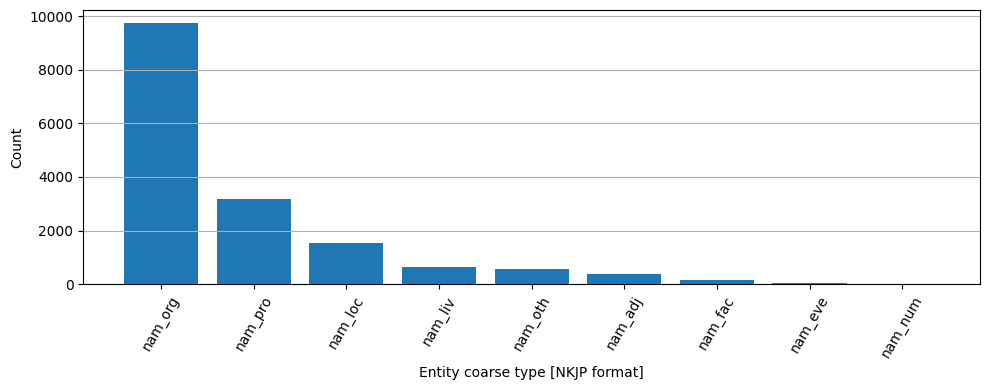

In [54]:
ctype_names = [ctype for ctype, count in ctypes_sorted] 
ctype_count = [count for ctype, count in ctypes_sorted] 

plt.figure(figsize=(10, 4))
plt.bar(ctype_names, ctype_count)
plt.xlabel("Entity coarse type [NKJP format]")
plt.ylabel("Count")
plt.xticks(rotation=60)
plt.tight_layout()
plt.grid(axis='y', which="major")
plt.show()

### 9. Display 10 most frequent Named Entities for each coarse-grained type.

The output was saved to the 'ner_9_output.txt' file.

In [58]:
for ctype in ctypes_counter.keys():
    print(f"\n\n{ctype.upper()}:")
    
    entities_filtered = [entity[0] for entity in entities_n82_all if get_coarse_type(entity) == ctype]
    ef_counter = Counter(entities_filtered)
    for entity, count in ef_counter.most_common(10):
        print(f"{entity} [{count}]")



NAM_PRO:
dzieje_(apostolskie) . u . [1097]
dziennik . u . [438]
dziennik . urz [80]
ordynacja podatkowy [78]
kodeks karny [68]
monitor polska [62]
sprawa wewnętrzny [51]
kodeks postępowanie cywilny [41]
kodeks postępowanie administracyjny [40]
kodeks postępowanie karny [36]


NAM_LOC:
rzeczpospolita polski [815]
rzeczpospolita polska [95]
polska [72]
warszawa [71]
nawóz [28]
konfederacja szwajcarski [14]
rejestr [8]
londyn [7]
mazowiecki [7]
rad [6]


NAM_ORG:
skarb państwo [410]
minister sprawiedliwość [322]
unia europejski [297]
minister obrona narodowy [287]
rada minister [279]
państwowy komisja wyborczy [268]
prezes rad minister [264]
państwowy straż pożarny [259]
minister finanse [234]
prezes urząd [201]


NAM_FAC:
inspektor nadzór wewnętrzny [50]
komendant główny [16]
straż graniczny [13]
mangan [8]
obrona narodowy [6]
krajowy rejestr karny [5]
zatoka gdańska [4]
zasłużony dawca przeszczep [4]
molibden [4]
mn [3]


NAM_LIV:
kasa chora [109]
pan [40]
straż graniczny [36]
krajowy

### 10. Display 50 most frequent Named Entities including their count and fine-grained type.


In [59]:
entities_n82_bases_all = [(entity[0], entity[2]) for entity in entities_n82_all]
most_common_50 = Counter(entities_n82_bases_all).most_common(50)
most_common_50

[(('dzieje_(apostolskie) . u .', 'nam_pro_media_periodic'), 1097),
 (('rzeczpospolita polski', 'nam_loc_gpe_country'), 815),
 (('dziennik . u .', 'nam_pro_media_periodic'), 438),
 (('skarb państwo', 'nam_org_institution'), 410),
 (('złoty', 'nam_oth_currency'), 334),
 (('minister sprawiedliwość', 'nam_org_institution'), 322),
 (('unia europejski', 'nam_org_organization'), 296),
 (('minister obrona narodowy', 'nam_org_institution'), 287),
 (('rada minister', 'nam_org_institution'), 279),
 (('państwowy komisja wyborczy', 'nam_org_institution'), 267),
 (('prezes rad minister', 'nam_org_institution'), 264),
 (('minister finanse', 'nam_org_institution'), 234),
 (('państwowy straż pożarny', 'nam_org_organization'), 225),
 (('polski', 'nam_adj_country'), 204),
 (('prezes urząd', 'nam_org_institution'), 201),
 (('urząd patentowy', 'nam_org_institution'), 196),
 (('urząd ochrona państwo', 'nam_org_institution'), 181),
 (('euro', 'nam_oth_currency'), 118),
 (('sąd najwyższy', 'nam_org_institutio

### 11. Display 5 sentences containing at least 2 recognized named entities with different types. Highlight the recognized spans with color.

### 12. Answer the following questions:
 - #### Which of the method (counting expressions with capital letters vs. NER) worked better for the task concerned with identification of the proper names?

    NER worked better, because it is able to catch constructions like 'ustawie z dnia 15 marca 1933 r . o zbiórkach publicznych', where not every first letter is capitalized.

 - #### What are the drawbacks of the method based on capital letters?

   It cannot catch a construction mentioned above.

 - #### What are the drawbacks of the method based on NER?

   It takes more time to prepare the model correctly. The model itself has to be trained. I've been using Clarin n82 model, but it took a lot of time to get the result from https://ws.clarin-pl.eu/ner 

 - #### Which of the coarse-grained NER groups has the best and which has the worst results? Try to justify this observation.

    NAM_ORG group is the most frequent one, because the corpus is based on polish law acts, which contain a lot of organizations' names. NAM_NUM is the least frequent one as it is a class for non-date numbers like postal code, building number etc.

 - #### Do you think NER is sufficient for identifying different occurrences of the same entity (i.e. consider "USA" and "Stany Zjednoczone" and "Stany Zjednoczone Ameryki Północnej")? If not, can you suggest an algorithm or a tool that would be able to group such names together?

    I think that NER alone is not sufficient for such a task. A [word2vec](https://en.wikipedia.org/wiki/Word2vec) algorithm is capable of finding synonyms.

 - #### Can you think of a real world problem that would benefit the most from application of Named Entity Recognition algorithm?

    Biomedical terms like drug names, chemical components, genes' names could use the Named Entity Recognition alg. as these are complicated words with many non-standard constructions like digits inside the name.

